# data analysis and wrangling


## Imports

In [25]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import ppscore as pps

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


## Load Data

In [26]:
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')
combine = [train_df , test_df]
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [27]:
# for dataset in combine:
#     dataset['Mu'] = 1
#     dataset.loc[(dataset.Ticket.duplicated(keep= False)) , 'Mu'] = 0
#     dataset['Mu'] = dataset['Mu'].astype(int)
# train_df[['Mu', 'Survived']].groupby(['Mu'], as_index=False).mean()
# pd.crosstab(train_df['Mu'], train_df['Survived'])

In [28]:
arr = train_df.pivot_table(index=['Ticket'], aggfunc='size')
for x in arr.index:
     train_df.loc[ train_df['Ticket'] == x, 'Mu1'] = arr.get(x)
     test_df.loc[ test_df['Ticket'] == x, 'Mu1'] = arr.get(x) + 1 
     test_df.loc[ test_df.Mu1.isnull(), 'Mu1'] = 1
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mu1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [29]:
cabin_category = {'A':9, 'B':8, 'C':7, 'D':6, 'E':5, 'F':4, 'G':3, 'T':2, 'U':1}
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].fillna('U')
    dataset['Cabin'] = dataset['Cabin'].replace('([0-9]+)', '',regex=True).str.slice(0, 1)
    dataset['Cabin'] = dataset['Cabin'].map(cabin_category)
train_df[["Cabin", "Survived"]].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# pd.crosstab(train_df['Cabin'], train_df['Survived'])

,Cabin,Survived
5,6,0.757576
4,5,0.750000
7,8,0.744681
3,4,0.615385
6,7,0.593220
2,3,0.500000
8,9,0.466667
0,1,0.299854
1,2,0.000000


In [30]:
# pd.crosstab(train_df['Cabin'], train_df['Sex'])


In [31]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop([ 'Ticket'], axis=1)
test_df = test_df.drop([  'Ticket'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 13) (418, 12) (891, 13) (418, 12)


('After', (891, 12), (418, 11), (891, 12), (418, 11))

In [32]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [33]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Lady', 'Ms', 'Countess'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Sir', 'Major'], 'Mr')
    dataset['Title'] = dataset['Title'].replace('^(?!.*(Miss|Mrs|Mr|Master)).*$', 'Rare',regex=True)
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.705882
2,Mr,0.159615
3,Mrs,0.793651
4,Rare,0.222222


In [34]:
title_mapping = {"Mr": 1, "Miss": 4, "Mrs": 2, "Master": 3, "Rare": 0}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Mu1,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,S,1.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,7,C,1.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,S,1.0,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,7,S,2.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,S,1.0,1


In [35]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 11), (418, 11))

In [36]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Mu1,Title
0,0,3,0,22.0,1,0,7.2500,1,S,1.0,1
1,1,1,1,38.0,1,0,71.2833,7,C,1.0,2
2,1,3,1,26.0,0,0,7.9250,1,S,1.0,4
3,1,1,1,35.0,1,0,53.1000,7,S,2.0,2
4,0,3,0,35.0,0,0,8.0500,1,S,1.0,1


## Completing a numerical continuous feature¶


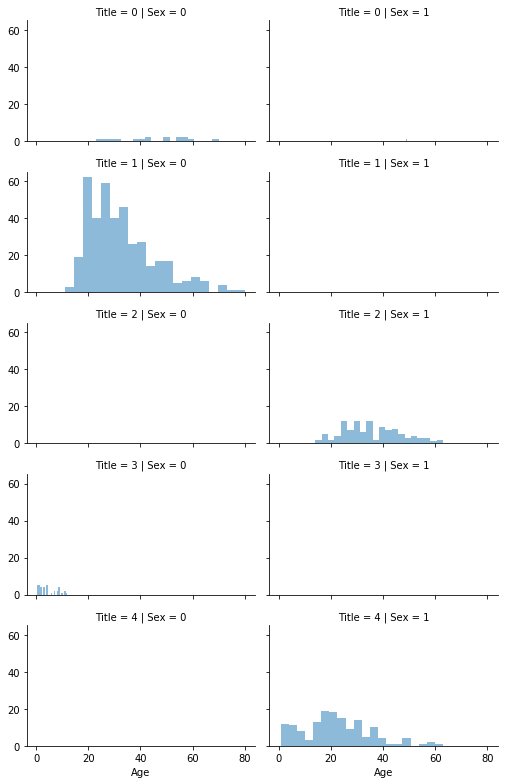

In [37]:
grid = sns.FacetGrid(train_df, row='Title', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [38]:
guess_ages = np.zeros((2,5))
guess_ages

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [39]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,5):
            guss_df = dataset[(dataset['Sex'] == i) & (dataset['Title'] == j +1)]['Age'].dropna()
            guss_age = guss_df.median()
            if guss_age != guss_age:
                guss_age = -5 #dataset[(dataset['Sex'] == i)]['Age'].dropna().median()
            guess_ages[i,j] = int(guss_age/0.5 + 0.5) * 0.5
    for i in range(0,2):
        for j in range(0,5):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i ) & ( dataset.Title == j+1), 'Age'] = guess_ages[i,j]
    
    dataset.loc[(dataset.Age.isnull()), 'Age'] = dataset[(dataset['Sex'] == i)]['Age'].dropna().median()           
    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Mu1,Title
0,0,3,0,22,1,0,7.2500,1,S,1.0,1
1,1,1,1,38,1,0,71.2833,7,C,1.0,2
2,1,3,1,26,0,0,7.9250,1,S,1.0,4
3,1,1,1,35,1,0,53.1000,7,S,2.0,2
4,0,3,0,35,0,0,8.0500,1,S,1.0,1


In [40]:
for dataset in combine:    
    dataset.loc[ (dataset['Title'] == 0) & (dataset['Age'] <= 18)& (dataset['Sex'] <= 0), 'Title'] = 3
    dataset.loc[ (dataset['Title'] == 0) & (dataset['Age'] <= 18)& (dataset['Sex'] <= 1), 'Title'] = 4
    dataset.loc[ (dataset['Title'] == 0) & (dataset['Age'] > 18)& (dataset['Sex'] <= 1), 'Title'] = 2
    dataset.loc[ (dataset['Title'] == 0) & (dataset['Age'] > 18)& (dataset['Sex'] <= 0), 'Title'] = 1

# train_df = train_df.drop(['Sex'], axis=1)
# test_df = test_df.drop(['Sex'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Mu1,Title
0,0,3,0,22,1,0,7.2500,1,S,1.0,1
1,1,1,1,38,1,0,71.2833,7,C,1.0,2
2,1,3,1,26,0,0,7.9250,1,S,1.0,4
3,1,1,1,35,1,0,53.1000,7,S,2.0,2
4,0,3,0,35,0,0,8.0500,1,S,1.0,1


In [41]:
# train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
# train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

In [42]:
# for dataset in combine:    
#     dataset.loc[ dataset['Age'] <= 16, 'Age'] = 4
#     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 3
#     dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
#     dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 1
#     dataset.loc[ dataset['Age'] > 64, 'Age'] = 0
# train_df.head()

In [43]:
# train_df = train_df.drop(['AgeBand'], axis=1)
# combine = [train_df, test_df]
# train_df.head()

In [44]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


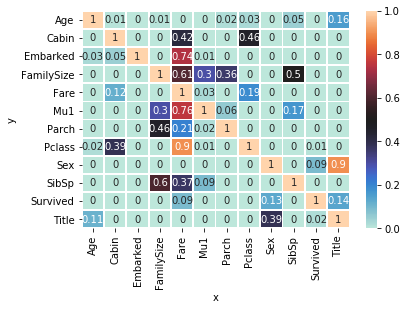

In [45]:
matrix_pps = pps.matrix(train_df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
matrix_pps = matrix_pps.apply(lambda x: round(x, 2))

sns.heatmap(matrix_pps, vmin=0, vmax=1, cmap="icefire", linewidths=0.75, annot=True)

In [46]:
# for dataset in combine:
#     dataset['IsAlone'] = 0
#     dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

# train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

In [47]:
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]

train_df.head()

# train_df = train_df.drop([ 'FamilySize'], axis=1)
# test_df = test_df.drop([ 'FamilySize'], axis=1)
# combine = [train_df, test_df]

# train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Mu1,Title,FamilySize
0,0,3,0,22,7.2500,1,S,1.0,1,2
1,1,1,1,38,71.2833,7,C,1.0,2,2
2,1,3,1,26,7.9250,1,S,1.0,4,1
3,1,1,1,35,53.1000,7,S,2.0,2,2
4,0,3,0,35,8.0500,1,S,1.0,1,1


In [48]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Sex + dataset.Pclass + 1

# train_df.loc[:, ['Sex*Class', 'Age', 'Pclass']].head(10)

In [49]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [50]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [51]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 2, 'Q': 1} ).astype(int)

train_df.head()

# train_df = train_df.drop(['Embarked'], axis=1)
# test_df = test_df.drop(['Embarked'], axis=1)
# combine = [train_df, test_df]

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Mu1,Title,FamilySize,Age*Class
0,0,3,0,22,7.2500,1,0,1.0,1,2,4
1,1,1,1,38,71.2833,7,2,1.0,2,2,3
2,1,3,1,26,7.9250,1,0,1.0,4,1,5
3,1,1,1,35,53.1000,7,0,2.0,2,2,3
4,0,3,0,35,8.0500,1,0,1.0,1,1,4


In [52]:
for dataset in combine:
    dataset['Pclass'] = dataset['Pclass'].fillna(freq_port)
    
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [53]:
for dataset in combine:
    dataset['Pclass'] = dataset['Pclass'].map( {3: 0, 2: 1, 1: 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Mu1,Title,FamilySize,Age*Class
0,0,0,0,22,7.2500,1,0,1.0,1,2,4
1,1,2,1,38,71.2833,7,2,1.0,2,2,3
2,1,0,1,26,7.9250,1,0,1.0,4,1,5
3,1,2,1,35,53.1000,7,0,2.0,2,2,3
4,0,0,0,35,8.0500,1,0,1.0,1,1,4


In [54]:
for dataset in combine:
    dataset['E*P'] = dataset.Cabin + dataset.Pclass + dataset.Embarked + 1

# train_df.loc[:, ['E*P*', 'Cabin', 'Pclass', '']].head(10)

In [55]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Mu1,Title,FamilySize,Age*Class,E*P
0,892,0,0,34,7.8292,1,1,1.0,1,1,4,3
1,893,0,1,47,7.0000,1,0,1.0,2,2,5,2
2,894,1,0,62,9.6875,1,1,1.0,1,1,3,4
3,895,0,0,27,8.6625,1,0,1.0,1,1,4,2
4,896,0,1,22,12.2875,1,0,2.0,2,3,5,2


In [56]:
# train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
# train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

In [57]:
# for dataset in combine:
#     dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
#     dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
#     dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
#     dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
#     dataset['Fare'] = dataset['Fare'].astype(int)

# train_df = train_df.drop(['FareBand'], axis=1)
# combine = [train_df, test_df]
    
# train_df.head(10)

In [58]:
# dummy_col=['Title', 'Age', 'FamilySize', 'Cabin', 'Embarked', 'Pclass', 'Fare']


# df = pd.concat((train_df.loc[:,'Pclass':'IsAlone'], test_df.loc[:,'Pclass':'IsAlone'])).reset_index(drop=True)
# dummy = pd.get_dummies(df[dummy_col], columns=dummy_col, drop_first=False)
# df = pd.concat([dummy, df], axis = 1)



# df = df.drop(dummy_col, axis=1)

# # train_df = df[:train_df.shape[0]]
# # test_df = df[train_df.shape[0]:]   
   

# X_train = df[:train_df.shape[0]]
# Y_train = train_df["Survived"]
# X_test  =  df[train_df.shape[0]:]   
# X_train.shape, Y_train.shape, X_test.shape


In [59]:
x = train_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_df[:] = x_scaled

x = test_df.values 

pass_temp = test_df["PassengerId"]

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
test_df[:] = x_scaled


combine = [train_df, test_df]
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Mu1,Title,FamilySize,Age*Class,E*P
0,0.0,0.0,0.0,0.2750,0.014151,0.00,0.0,0.000000,0.000000,0.1,0.666667,0.000000
1,1.0,1.0,1.0,0.4750,0.139136,0.75,1.0,0.000000,0.333333,0.1,0.333333,0.833333
2,1.0,0.0,1.0,0.3250,0.015469,0.00,0.0,0.000000,1.000000,0.0,1.000000,0.000000
3,1.0,1.0,1.0,0.4375,0.103644,0.75,0.0,0.166667,0.333333,0.1,0.333333,0.666667
4,0.0,0.0,0.0,0.4375,0.015713,0.00,0.0,0.000000,0.000000,0.0,0.666667,0.000000
5,0.0,0.0,0.0,0.3750,0.016510,0.00,0.5,0.000000,0.000000,0.0,0.666667,0.083333
6,0.0,1.0,0.0,0.6750,0.101229,0.50,0.0,0.000000,0.000000,0.0,0.000000,0.500000
7,0.0,0.0,0.0,0.0250,0.041136,0.00,0.0,0.500000,0.666667,0.4,0.666667,0.000000
8,1.0,0.0,1.0,0.3375,0.021731,0.00,0.0,0.333333,0.333333,0.2,1.000000,0.000000
9,1.0,0.5,1.0,0.1750,0.058694,0.00,1.0,0.166667,0.333333,0.1,0.666667,0.250000


## Model, predict and solve


In [60]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape


((891, 11), (891,), (418, 11))

In [61]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
Y_pred.astype(int)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.35

In [62]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.254903
0,Pclass,1.439538
7,Title,0.646834
10,E*P,0.531731
3,Fare,0.365728
4,Cabin,0.357638
5,Embarked,0.320298
9,Age*Class,-0.208066
6,Mu1,-0.260102
8,FamilySize,-1.298081


In [63]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
Y_pred = Y_pred.astype(int)

acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

84.51

In [64]:
knn = KNeighborsClassifier(n_neighbors = 35)
knn.fit(X_train, Y_train)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
Y_pred = knn.predict(X_test)
Y_pred = Y_pred.astype(int)
acc_knn

81.59

In [65]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

74.97

In [66]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

65.99

In [67]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.69

In [68]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.12

In [78]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
Y_pred = Y_pred.astype(int)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.54

In [70]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
Y_pred = Y_pred.astype(int)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.54

In [79]:
MLP = MLPClassifier(random_state=1, max_iter=300 )
MLP.fit(X_train, Y_train)
Y_pred = MLP.predict(X_test)
Y_pred = Y_pred.astype(int)
MLP.score(X_train, Y_train)
acc_MLP = round(MLP.score(X_train, Y_train) * 100, 2)
acc_MLP

84.29

In [72]:
    models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'MLP'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_MLP]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.54
8,Decision Tree,98.54
0,Support Vector Machines,84.51
9,MLP,84.29
1,KNN,81.59
7,Linear SVC,79.69
2,Logistic Regression,79.35
6,Stochastic Gradient Decent,79.12
4,Naive Bayes,74.97
5,Perceptron,65.99


In [80]:
submission = pd.DataFrame({
        "PassengerId": pass_temp,
        "Survived": Y_pred
    })
submission.to_csv('../out/submission.csv', index=False)

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])
X_train = X_train.astype(float)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train.values, Y_train.values, epochs=25)              

Train on 891 samples
Epoch 1/25
891/891 [==============================] - 0s 280us/sample - loss: 0.4952 - accuracy: 0.7980
Epoch 2/25
891/891 [==============================] - 0s 94us/sample - loss: 0.4237 - accuracy: 0.8126
Epoch 3/25
891/891 [==============================] - 0s 69us/sample - loss: 0.4072 - accuracy: 0.8294
Epoch 4/25
891/891 [==============================] - 0s 84us/sample - loss: 0.4136 - accuracy: 0.8148
Epoch 5/25
891/891 [==============================] - 0s 70us/sample - loss: 0.3927 - accuracy: 0.8350
Epoch 6/25
891/891 [==============================] - 0s 62us/sample - loss: 0.3914 - accuracy: 0.8316
Epoch 7/25
891/891 [==============================] - 0s 72us/sample - loss: 0.3784 - accuracy: 0.8451
Epoch 8/25
891/891 [==============================] - 0s 82us/sample - loss: 0.3732 - accuracy: 0.8451
Epoch 9/25
891/891 [==============================] - 0s 76us/sample - loss: 0.3792 - accuracy: 0.8395
Epoch 10/25
891/891 [==============================

In [75]:
Y_pred_r = model.predict(X_test)
Y_pred = np.zeros(len(Y_pred_r))
for  index, x in enumerate(Y_pred_r):
    if x[0] < x[1]:
        Y_pred[index] = 1
Y_pred = Y_pred.astype(int)
Y_pred        


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,